<h1> House Sale Price Prediction </h1>
- Dataset from: https://www.kaggle.com/harlfoxem/housesalesprediction

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA


In [2]:
seed = 1


In [3]:
df = pd.read_csv('./dataset/kc_house_data.csv')
df = df.drop('id', 1)
df = df.drop('date', 1)
df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00         1180      5650     1.0           0   
1  538000.0         3       2.25         2570      7242     2.0           0   
2  180000.0         2       1.00          770     10000     1.0           0   
3  604000.0         4       3.00         1960      5000     1.0           0   
4  510000.0         3       2.00         1680      8080     1.0           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3      7        1180              0      1955             0   
1     0          3      7        2170            400      1951          1991   
2     0          3      6         770              0      1933             0   
3     0          5      7        1050            910      1965             0   
4     0          3      8        1680              0      1987             0   

   zipcode      lat     long  sqft_living15  sqft_lot15  
0    98178  47.5112 -122.257           1340        5650  
1    98125  47.7210 -122.319           1690        7639  
2    98028  47.7379 -122.233           2720        8062  
3    98136  47.5208 -122.393           1360        5000  
4    98074  47.6168 -122.045           1800        7503

In [4]:
df.shape

(21613, 19)

In [5]:
# df.price = df.price + np.random.randint(0, 10e+07, df.shape[0])

<h1> Check Null Data </h1>

In [6]:
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

<h3> IF Missing Data </h3>
<hr>
- หาข้อมูลเพิ่มได้ไหม
- ข้ามตัวอย่านั้นไป 
- พยายามเดา ค่าของข้อมูล ที่หายไป
    - เดาจากข้อมูลใกล้เคียง
    - เดาจากค่าสถิติ

In [7]:
missdf = df.copy()

missdf = missdf.set_value(np.random.choice(np.arange(0, missdf.shape[0]-1), 10), 'sqft_living', None)
missdf.isnull().sum()

price             0
bedrooms          0
bathrooms         0
sqft_living      10
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

In [8]:
missdf.sqft_living.fillna( missdf.sqft_living.mean(), inplace=True )
missdf.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [9]:
df.describe()

price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  2.161300e+04   
mean   5.400881e+05      3.370842      2.114757   2079.899736  1.510697e+04   
std    3.671272e+05      0.930062      0.770163    918.440897  4.142051e+04   
min    7.500000e+04      0.000000      0.000000    290.000000  5.200000e+02   
25%    3.219500e+05      3.000000      1.750000   1427.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068800e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean       1.494309      0.007542      0.234303      3.409430      7.656873   
std        0.539989      0.086517      0.766318      0.650743      1.175459   
min        1.000000      0.000000      0.000000      1.000000      1.000000   
25%        1.000000      0.000000      0.000000      3.000000      7.000000   
50%        1.500000      0.000000      0.000000      3.000000      7.000000   
75%        2.000000      0.000000      0.000000      4.000000      8.000000   
max        3.500000      1.000000      4.000000      5.000000     13.000000   

         sqft_above  sqft_basement      yr_built  yr_renovated       zipcode  \
count  21613.000000   21613.000000  21613.000000  21613.000000  21613.000000   
mean    1788.390691     291.509045   1971.005136     84.402258  98077.939805   
std      828.090978     442.575043     29.373411    401.679240     53.505026   
min      290.000000       0.000000   1900.000000      0.000000  98001.000000   
25%     1190.000000       0.000000   1951.000000      0.000000  98033.000000   
50%     1560.000000       0.000000   1975.000000      0.000000  98065.000000   
75%     2210.000000     560.000000   1997.000000      0.000000  98118.000000   
max     9410.000000    4820.000000   2015.000000   2015.000000  98199.000000   

                lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000   21613.000000   21613.000000  
mean      47.560053   -122.213896    1986.552492   12768.455652  
std        0.138564      0.140828     685.391304   27304.179631  
min       47.155900   -122.519000     399.000000     651.000000  
25%       47.471000   -122.328000    1490.000000    5100.000000  
50%       47.571800   -122.230000    1840.000000    7620.000000  
75%       47.678000   -122.125000    2360.000000   10083.000000  
max       47.777600   -121.315000    6210.000000  871200.000000

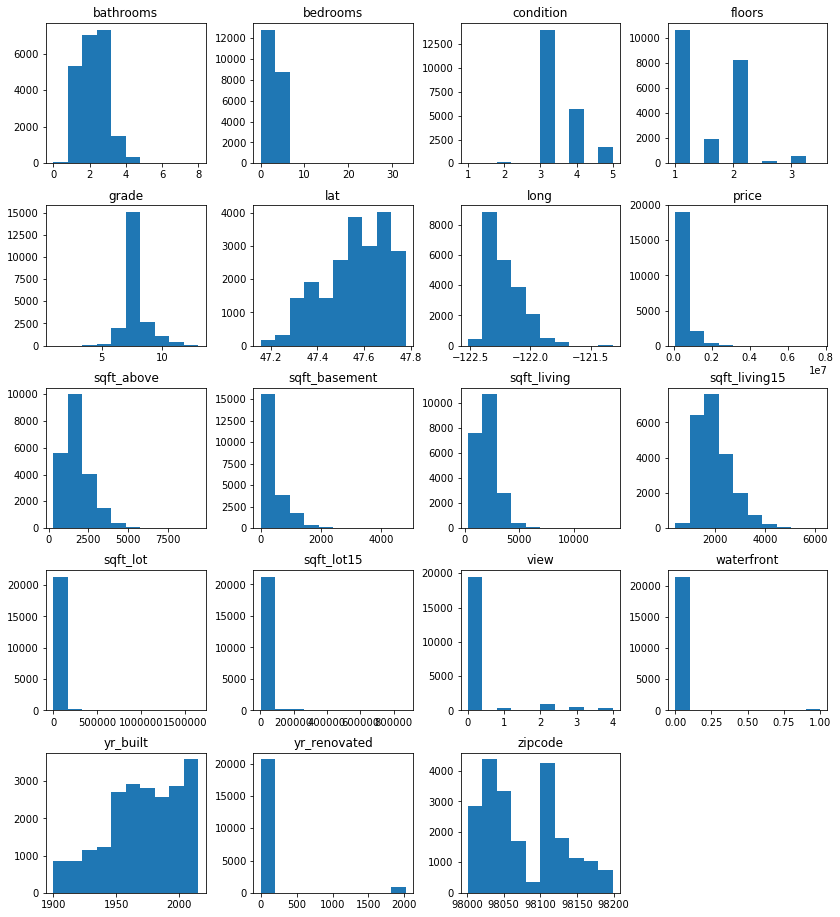

In [10]:
axs = df.hist(figsize=(14, 16))
for r in axs:
    for ax in r:
        ax.grid(False)

In [11]:
Y = df.price
df.drop('price', 1)

# แบ่งข้อมูลออกเป็น 2 ส่วน
#  1. สำหรับฝึก
#  2. สำหรับทดสอบ

test_ratio = 0.95
X_train, X_test, Y_train, Y_test = train_test_split(df, Y, test_size=test_ratio, random_state=seed)

print( X_train.shape)
print( X_test.shape)

(1080, 19)
(20533, 19)


In [26]:
# สร้างโมเดล 
model = LinearRegression()

# ฝึกโมเดล
model.fit(X_train, Y_train)

# พยากรณ์ค่า
pred_price = model.predict(X_test)

# วัดประสิทธิภาพโมเดล
MSE = mean_squared_error(Y_test, pred_price)
score = model.score(X_test, Y_test)
print(score)
print(MSE)

1.0
1.59089890687e-19


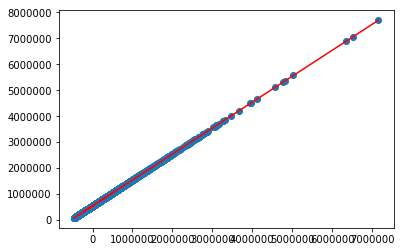

In [27]:
X_new = PCA(n_components=1).fit_transform( X_test, Y_test ).ravel()
# pca_model = PCA(n_components=1)
# pca_model
# pca_model.fit(X_test, Y_test)
# X_new = pca_model.transform(X_test)
# X_new.ravel()

tmp = pd.DataFrame({'X':X_new, 'Y':Y_test, 'P':pred_price}).sort_values('X')
plt.scatter(tmp.X, tmp.Y)
plt.plot(tmp.X, tmp.P, 'r')
plt.show()

In [28]:
model = RandomForestRegressor().fit(X_train, Y_train)
pred_price = model.predict(X_test)
model.score(X_test, Y_test)

0.96558405134453162

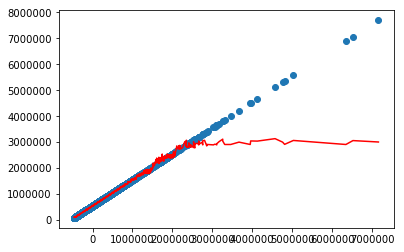

In [29]:
X_new = PCA(n_components=1).fit_transform( X_test, Y_test ).ravel()
tmp = pd.DataFrame({'X':X_new, 'Y':Y_test, 'P':pred_price}).sort_values('X')
plt.scatter(tmp.X, tmp.Y)
plt.plot(tmp.X, tmp.P, 'r')
plt.show()

In [16]:
diff = np.abs(Y_test-pred_price)
rest = pd.DataFrame({'Real Price':Y_test, 'Predict Price':pred_price, 'Diff':diff}, columns=['Real Price', 'Predict Price', 'Diff'])
rest.sort_values('Diff').head(10)

Real Price  Predict Price  Diff
3135     275000.0       275000.0   0.0
6779     310000.0       310000.0   0.0
1614     425000.0       425000.0   0.0
4973     385000.0       385000.0   0.0
9503     435000.0       435000.0   0.0
17622    635000.0       635000.0   0.0
12472    314950.0       314950.0   0.0
17166    360000.0       360000.0   0.0
11549    290000.0       290000.0   0.0
18780    415000.0       415000.0   0.0

In [17]:
rest.describe()

Real Price  Predict Price          Diff
count  2.053300e+04   2.053300e+04  2.053300e+04
mean   5.394796e+05   5.373872e+05  4.592478e+03
std    3.665221e+05   3.461939e+05  6.782369e+04
min    7.500000e+04   1.091900e+05  0.000000e+00
25%    3.215000e+05   3.207500e+05  2.000000e+02
50%    4.500000e+05   4.503600e+05  5.420000e+02
75%    6.439500e+05   6.446000e+05  1.295000e+03
max    7.700000e+06   3.142500e+06  4.701500e+06